In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import dlib

In [24]:
#face detector, landmark detector load

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [25]:
#image load

path_dir = './LFW-FER/eval/negative/'
file_list = os.listdir(path_dir)

# file_list[0]
img = cv2.imread(path_dir + file_list[0])

In [18]:
faces = face_detector(img, 1)

In [26]:
face_landmark, eyes_landmark = [], []

for k, d in enumerate(faces):
    print("Detection {} face detection -> LeftTop: ({},{}) RightBottom: ({},{})".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
    
    landmarks = landmark_detector(img, d)

    #face landmark number 0 ~ 16, 26 ~ 17 -> face contour
    for n in range(0, 17):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        face_landmark.append((x, y))
        #cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

    for n in range(26, 16, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        face_landmark.append((x, y))
        #cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

    #eye landmark number
    for n in range(36, 48):
        x = landmarks.part(n).x
        y = landmarks.part(n).y 
        eyes_landmark.append((x, y))


Detection 0 face detection -> LeftTop: (53,67) RightBottom: (182,196)


In [21]:
pt = np.array([face_landmark])

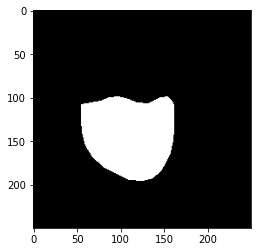

In [28]:
pt = np.array([face_landmark])
mask = np.zeros_like(img)
cv2.fillPoly(mask, pt, (255,255,255))

plt.imshow(mask)

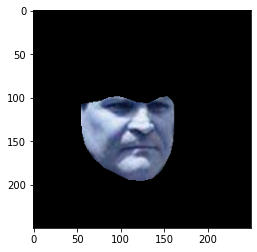

In [29]:
# 마스크를 사용하여 이미지에서 도형 부분 추출
result = cv2.bitwise_and(img, mask)

# 결과 이미지 표시
plt.imshow(result)